In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.drop(columns=['Outcome'])
y = data[['Outcome']]

We will split the data into a training set (60%), a test set (20%), and a validation set (20%).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=11)
eval_set = [(X_train, y_train), (X_val,y_val)]

In [5]:
model = XGBClassifier(tree_method='hist',
                      verbosity=2,
                      n_estimators=30,
                      max_depth=5,
                      max_leaves=0,
                      learning_rate=.1,
                      colsample_bytree=.5,
                      gamma=0,
                      eval_metric='auc')

In [6]:
model.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-auc:0.88051	validation_1-auc:0.75986
[1]	validation_0-auc:0.91284	validation_1-auc:0.79891
[2]	validation_0-auc:0.92465	validation_1-auc:0.80173
[3]	validation_0-auc:0.94027	validation_1-auc:0.81270
[4]	validation_0-auc:0.94583	validation_1-auc:0.80425
[5]	validation_0-auc:0.95299	validation_1-auc:0.79690
[6]	validation_0-auc:0.95272	validation_1-auc:0.79086
[7]	validation_0-auc:0.95953	validation_1-auc:0.78553
[8]	validation_0-auc:0.96120	validation_1-auc:0.78814
[9]	validation_0-auc:0.96611	validation_1-auc:0.79207
[10]	validation_0-auc:0.96833	validation_1-auc:0.79891
[11]	validation_0-auc:0.96711	validation_1-auc:0.79589
[12]	validation_0-auc:0.97009	validation_1-auc:0.79791
[13]	validation_0-auc:0.96945	validation_1-auc:0.79469
[14]	validation_0-auc:0.97065	validation_1-auc:0.79589
[15]	validation_0-auc:0.96980	validation_1-auc:0.79006
[16]	validation_0-auc:0.96934	validation_1-auc:0.78965
[17]	validation_0-auc:0.97108	validation_1-auc:0.79106
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=0,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [7]:
parameters = {'n_estimators' : [10, 25, 50, 75],
          'max_depth' : [4, 6, 10],
          'max_leaves' : [0, 2, 4, 6, 8, 10],    # max_leaves set to 0 allows for an infinite number of leaves
          'learning_rate' : [1.0, .5, .3, .1, .01],
          'colsample_bytree' : [.8, .6, .4, .2],
          'gamma' : [1, 10, 100]
}

In [8]:
kfold = KFold(n_splits=4, random_state=21, shuffle=True)
grid = GridSearchCV(model, parameters, scoring='roc_auc', n_jobs=-1, cv=kfold, verbose=1)
grid.fit(X_train, y_train)

Fitting 4 folds for each of 4320 candidates, totalling 17280 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=21, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     intera...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=30,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.6, 0.4, 0.2],
                         'gamma': [1, 10, 100],
                         'learning_rate': [1.0, 0.5, 0.3, 0.1, 0.01],
                         'max_depth': [4, 6, 10],
                         'max_leaves': [0, 2, 4, 6, 8, 10],
                         'n_estimators': [10, 25, 50, 75]},
             scoring='roc_auc', verbose=1)

In [9]:
print('The model with the lowest loss has an AUC score of %.6f with parameters' % grid.best_score_)
for key, value in grid.best_params_.items():
    print(key, '=', value)

The model with the lowest loss has an AUC score of 0.849304 with parameters
colsample_bytree = 0.6
gamma = 1
learning_rate = 0.5
max_depth = 4
max_leaves = 2
n_estimators = 50


In [ ]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for i in range(len(means)):
    print('Score: %.6f, StD. % .6f, Parameters' % (means[i], stds[i]), params[i])

Score: 0.780789, StD.  0.011451, Parameters {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 1.0, 'max_depth': 4, 'max_leaves': 0, 'n_estimators': 10}
Score: 0.784397, StD.  0.008122, Parameters {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 1.0, 'max_depth': 4, 'max_leaves': 0, 'n_estimators': 25}
Score: 0.784397, StD.  0.008122, Parameters {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 1.0, 'max_depth': 4, 'max_leaves': 0, 'n_estimators': 50}
Score: 0.784397, StD.  0.008122, Parameters {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 1.0, 'max_depth': 4, 'max_leaves': 0, 'n_estimators': 75}
Score: 0.822267, StD.  0.016676, Parameters {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 1.0, 'max_depth': 4, 'max_leaves': 2, 'n_estimators': 10}
Score: 0.834451, StD.  0.015774, Parameters {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 1.0, 'max_depth': 4, 'max_leaves': 2, 'n_estimators': 25}
Score: 0.833066, StD.  0.015774, Parameters {'colsample_by

In [19]:
model = XGBClassifier(tree_method='hist',
                      verbosity=2,
                      n_estimators=grid.best_params_['n_estimators'],
                      max_depth=grid.best_params_['max_depth'],
                      max_leaves=grid.best_params_['max_leaves'],
                      learning_rate=grid.best_params_['learning_rate'],
                      colsample_bytree=grid.best_params_['colsample_bytree'],
                      gamma=grid.best_params_['gamma'],
                      eval_metric='auc')

In [20]:
model.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-auc:0.70383	validation_1-auc:0.67593
[1]	validation_0-auc:0.77602	validation_1-auc:0.74356
[2]	validation_0-auc:0.82325	validation_1-auc:0.76711
[3]	validation_0-auc:0.85219	validation_1-auc:0.78996
[4]	validation_0-auc:0.85357	validation_1-auc:0.78563
[5]	validation_0-auc:0.86076	validation_1-auc:0.79116
[6]	validation_0-auc:0.87345	validation_1-auc:0.79036
[7]	validation_0-auc:0.87492	validation_1-auc:0.80435
[8]	validation_0-auc:0.87793	validation_1-auc:0.80435
[9]	validation_0-auc:0.87971	validation_1-auc:0.81089
[10]	validation_0-auc:0.88362	validation_1-auc:0.80878
[11]	validation_0-auc:0.88669	validation_1-auc:0.80324
[12]	validation_0-auc:0.88741	validation_1-auc:0.80143
[13]	validation_0-auc:0.88942	validation_1-auc:0.80163
[14]	validation_0-auc:0.89033	validation_1-auc:0.79670
[15]	validation_0-auc:0.89375	validation_1-auc:0.79650
[16]	validation_0-auc:0.89540	validation_1-auc:0.79730
[17]	validation_0-auc:0.89698	validation_1-auc:0.79559
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

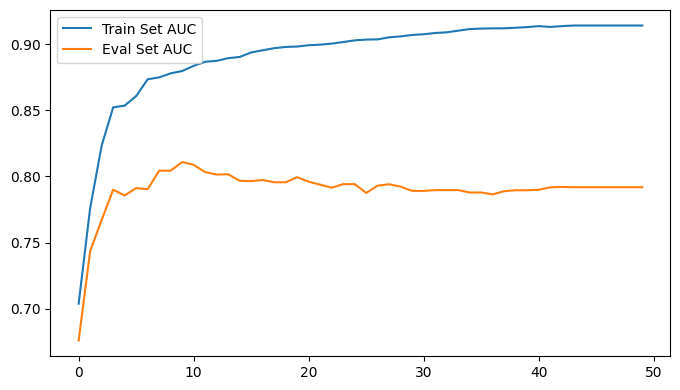

In [21]:
results = model.evals_result()

plt.figure(figsize=[8,4.5])
plt.plot(results['validation_0']['auc'], label='Train Set AUC')
plt.plot(results['validation_1']['auc'], label='Eval Set AUC')
plt.legend()
plt.show()

We will assume that a prediction probability of 0.5 or greater is classified as True and anything else as False.

In [31]:
preds_test = model.predict_proba(X_test)
results_test = pd.DataFrame({'Target' : np.array(y_test).T[0], 'True Prob' : preds_test[:,1], 'False Prob' : preds_test[:,0]})
results_test['Target'] = results_test['Target'].astype(bool)
results_test['Prediction'] = results_test['True Prob'] >= .5
results_test['Correct'] = results_test['Target'] == results_test['Prediction']
results_test.head()

,Target,True Prob,False Prob,Prediction,Correct
0,True,0.083637,0.916363,False,False
1,False,0.029537,0.970463,False,True
2,False,0.021180,0.978820,False,True
3,True,0.915359,0.084641,True,True
4,True,0.503141,0.496859,True,True


In [38]:
a = 100 * results_test[results_test['Target'] == True]['Correct'].sum() / len(results_test[results_test['Target'] == True])
print('Guessed Test True Correctly %.2f%%' % a)
b = 100 * results_test[results_test['Target'] == False]['Correct'].sum() / len(results_test[results_test['Target'] == False])
print('Guessed Test False Correctly %.2f%%' % b)
c = 100 * results_test['Correct'].sum() / len(results_test)
print('Guessed Test Correctly %.2f%%' % c)

Guessed Test True Correctly 56.67%
Guessed Test False Correctly 88.30%
Guessed Test Correctly 75.97%


In [33]:
preds_train = model.predict_proba(X_train)
results_train = pd.DataFrame({'Target' : np.array(y_train).T[0], 'True Prob' : preds_train[:,1], 'False Prob' : preds_train[:,0]})
results_train['Target'] = results_train['Target'].astype(bool)
results_train['Prediction'] = results_train['True Prob'] >= .5
results_train['Correct'] = results_train['Target'] == results_train['Prediction']
results_train.head()

,Target,True Prob,False Prob,Prediction,Correct
0,True,0.907153,0.092847,True,True
1,False,0.383216,0.616784,False,True
2,False,0.151906,0.848094,False,True
3,False,0.204963,0.795037,False,True
4,True,0.513132,0.486868,True,True


In [39]:
a = 100 * results_train[results_train['Target'] == True]['Correct'].sum() / len(results_train[results_train['Target'] == True])
print('Guessed Train True Correctly %.2f%%' % a)
b = 100 * results_train[results_train['Target'] == False]['Correct'].sum() / len(results_train[results_train['Target'] == False])
print('Guessed Train False Correctly %.2f%%' % b)
c = 100 * results_train['Correct'].sum() / len(results_train)
print('Guessed Train Correctly %.2f%%' % c)

Guessed Train True Correctly 72.22%
Guessed Train False Correctly 90.94%
Guessed Train Correctly 84.35%


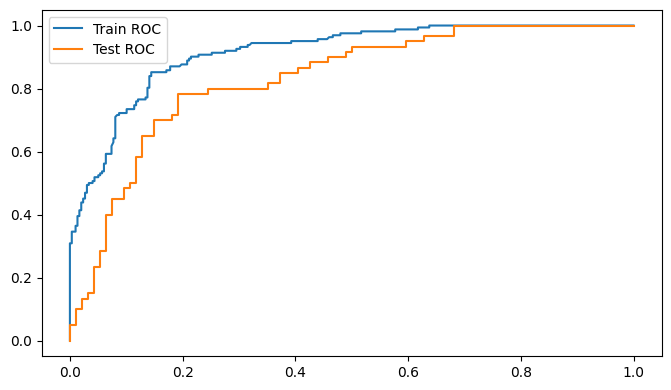

In [40]:
train_roc = roc_curve(results_train['Target'], results_train['True Prob'])
# eval_roc = roc_curve(results_test['Target'], results_test['True Prob'])
test_roc = roc_curve(results_test['Target'], results_test['True Prob'])

plt.figure(figsize=[8,4.5])
plt.plot(train_roc[0], train_roc[1], label='Train ROC')
plt.plot(test_roc[0], test_roc[1], label='Test ROC')
plt.legend()
plt.show()